In [66]:
# Load the necessary libraries.
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [67]:
# Load the dataset.
dataset = pd.read_csv(r"C:\Users\20106\Downloads\Breast_cancer_Data.csv")
print (dataset.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

## Task 1: Data Exploration and Preprocessing.

In [68]:
# Gather info such as number of null values and data types for each column in the dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1138 non-null   int64  
 1   diagnosis                1138 non-null   object 
 2   radius_mean              1138 non-null   float64
 3   texture_mean             1138 non-null   float64
 4   perimeter_mean           1138 non-null   float64
 5   area_mean                1138 non-null   float64
 6   smoothness_mean          1138 non-null   float64
 7   compactness_mean         1138 non-null   float64
 8   concavity_mean           1138 non-null   float64
 9   concave_points_mean      1138 non-null   float64
 10  symmetry_mean            1138 non-null   float64
 11  fractal_dimension_mean   1138 non-null   float64
 12  radius_se                1138 non-null   float64
 13  texture_se               1138 non-null   float64
 14  perimeter_se            

In [69]:
# Look for null values .
# There are no null values in the dataset.
dataset.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [70]:
# Print the shape of the dataset.
dataset.shape

(1138, 32)

In [71]:
# Look for duplicate values using the column "id".
duplicates = dataset["id"].duplicated().any()
print (duplicates)

True


In [72]:
# Since there are duplicated values we have to drop them.
# This code drops all duplicates keeping only the first occurrence. 
dataset = dataset.drop_duplicates(subset=["id"], keep="first")

In [73]:
# Check that all duplicates have been successfully removed.
# Since the output is false there are no more duplicates in the dataset.
duplicates = dataset["id"].duplicated().any()
print (duplicates)

False


In [74]:
# Print the dataset shape again.
dataset.shape

(569, 32)

In [75]:
# We can now drop the column "id" since it is no longer neccessary.
dataset_new = dataset.drop(["id"], axis = 1)
print (dataset_new.head)

<bound method NDFrame.head of     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0            0.11840           0.27760

In [76]:
# Explore the dataset characteristics such as mean, median and standard deviation (EDA).
print(dataset_new.describe(include="all"))

       diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count        569   569.000000    569.000000      569.000000   569.000000   
unique         2          NaN           NaN             NaN          NaN   
top            B          NaN           NaN             NaN          NaN   
freq         357          NaN           NaN             NaN          NaN   
mean         NaN    14.127292     19.289649       91.969033   654.889104   
std          NaN     3.524049      4.301036       24.298981   351.914129   
min          NaN     6.981000      9.710000       43.790000   143.500000   
25%          NaN    11.700000     16.170000       75.170000   420.300000   
50%          NaN    13.370000     18.840000       86.240000   551.100000   
75%          NaN    15.780000     21.800000      104.100000   782.700000   
max          NaN    28.110000     39.280000      188.500000  2501.000000   

        smoothness_mean  compactness_mean  concavity_mean  \
count        569.000000   

<Figure size 640x480 with 0 Axes>

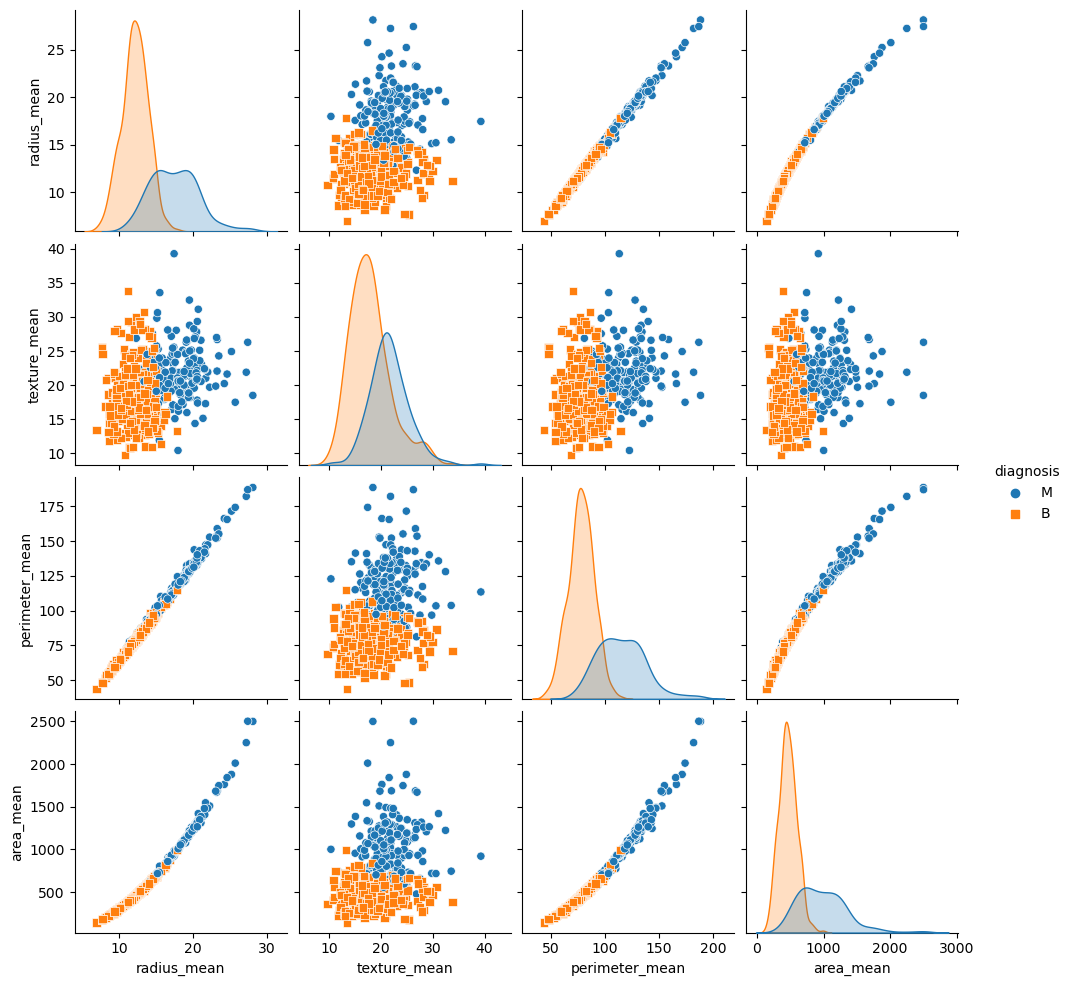

In [77]:
# Visualize the dataset and the relationship between columns using pair plot.
# The pair plot is used to visualize the clustering of the hue "diagnosis" (M/B) across the dataset.
plt.figure()
sns.pairplot(dataset_new[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "diagnosis"]], hue = "diagnosis", markers=["o", "s"])
plt.show()


<Axes: xlabel='diagnosis', ylabel='count'>

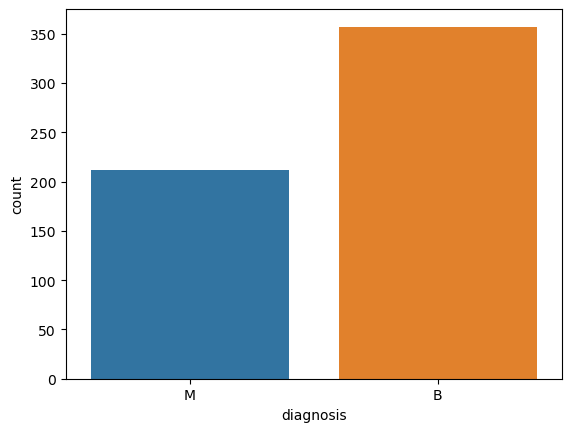

In [78]:
# Visualize the dataset using count plot.
# We can see that there are more benign samples than malignant.
sns.countplot(x = "diagnosis", data = dataset_new)

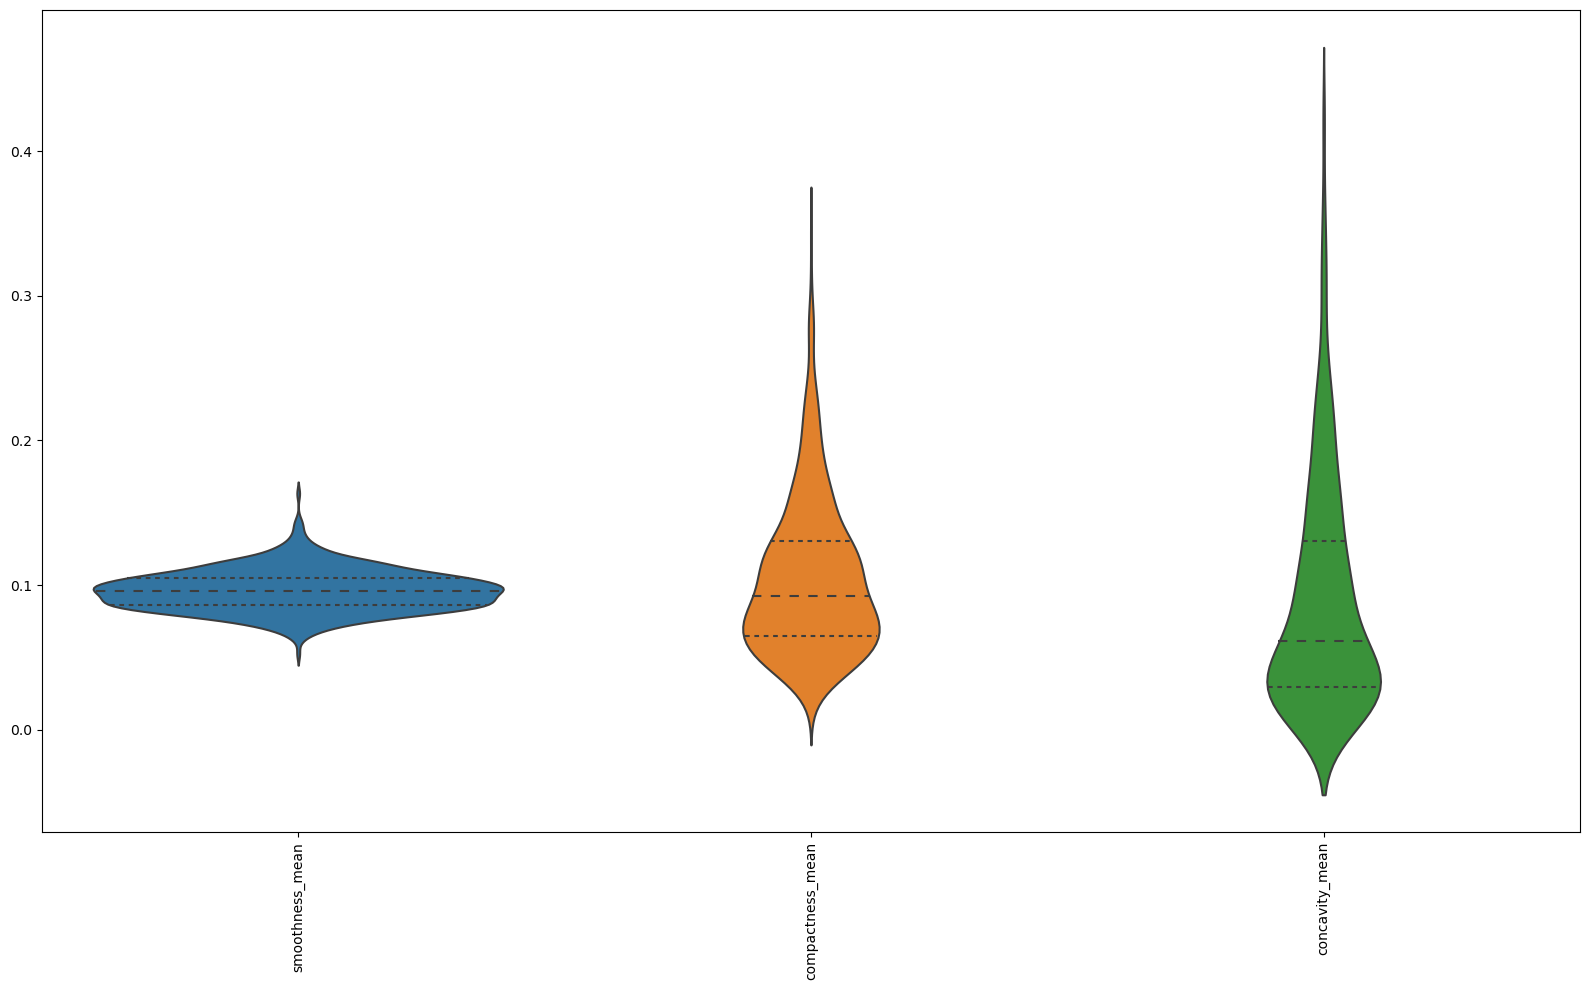

In [79]:
# Visualize the distibution of points in the dataset using violin plot.
columns_to_plot = ["smoothness_mean", "compactness_mean", "concavity_mean"]

plt.figure(figsize=(16, 10))
sns.violinplot(data=dataset_new[columns_to_plot], inner="quartile")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

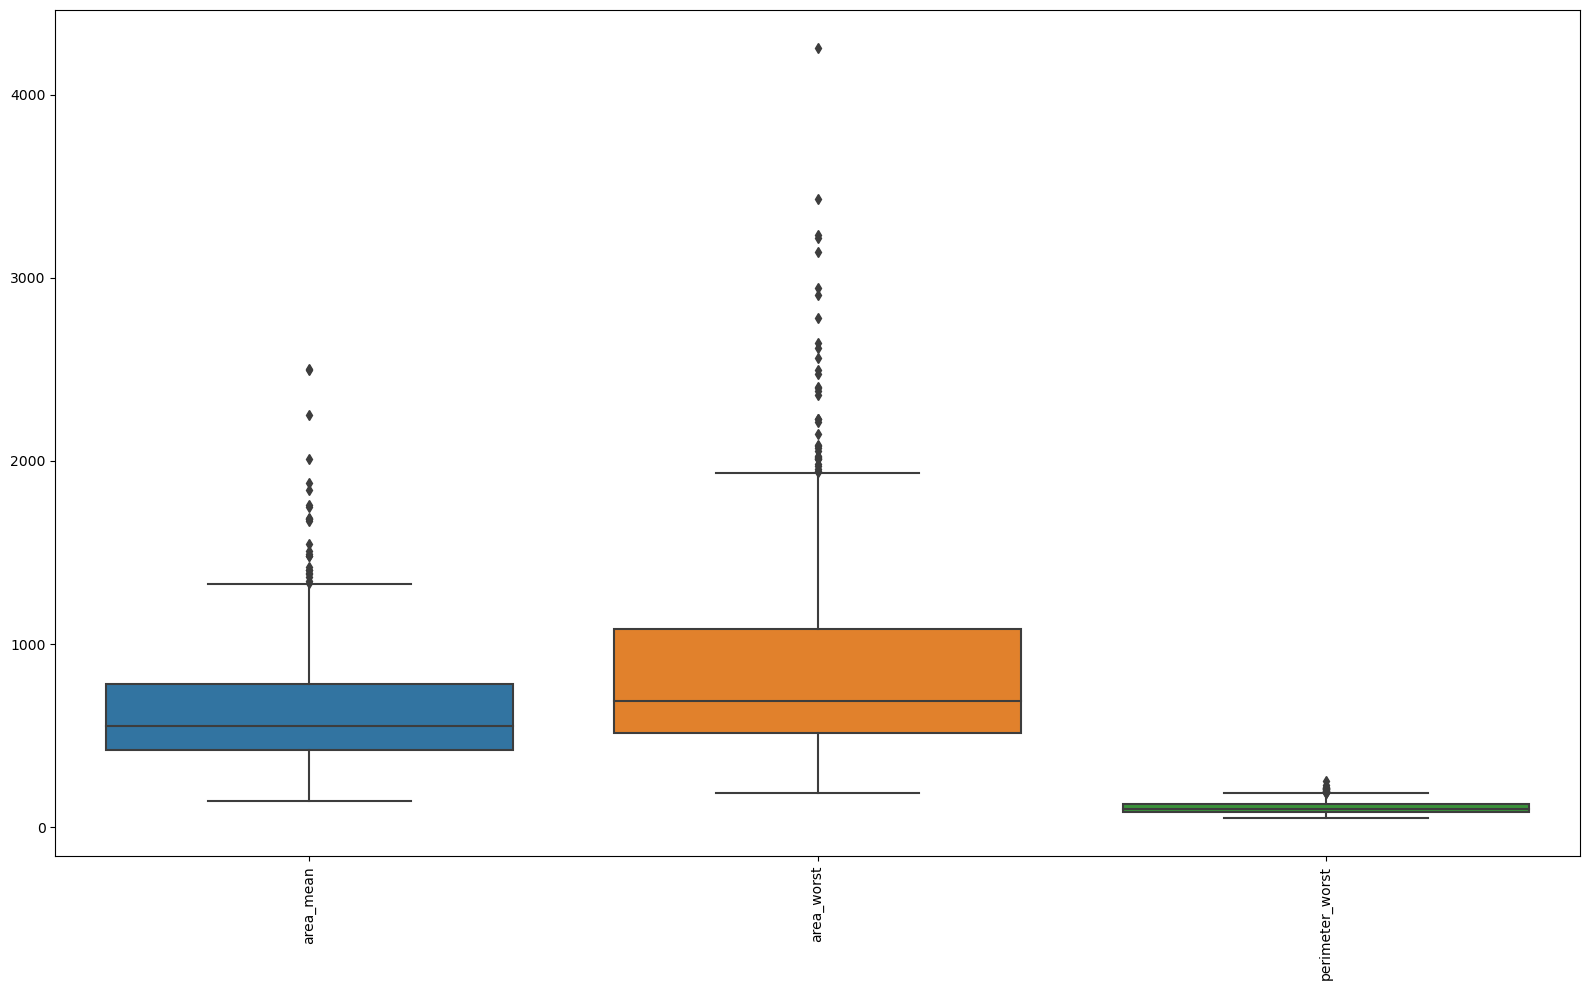

In [80]:
# Check for outliers in the dataset using box plot.
# We can tell from the box plot that the dataset is full of outliers that we need to take care of.
columns_to_plot = ["area_mean", "area_worst", "perimeter_worst"]

plt.figure(figsize=(16, 10))
sns.boxplot(data=dataset_new[columns_to_plot])
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

In [81]:
# There are multiple ways to handle ouliers one of them is the "Log transformation" which is mainly used to convert a 
# skewed distribution to a normal distribution/less-skewed distribution. 

numerical_columns = dataset_new.select_dtypes(include=["float64", "int64"]).columns
for col in numerical_columns:
    dataset_new[col] = np.log1p(dataset_new[col])
    

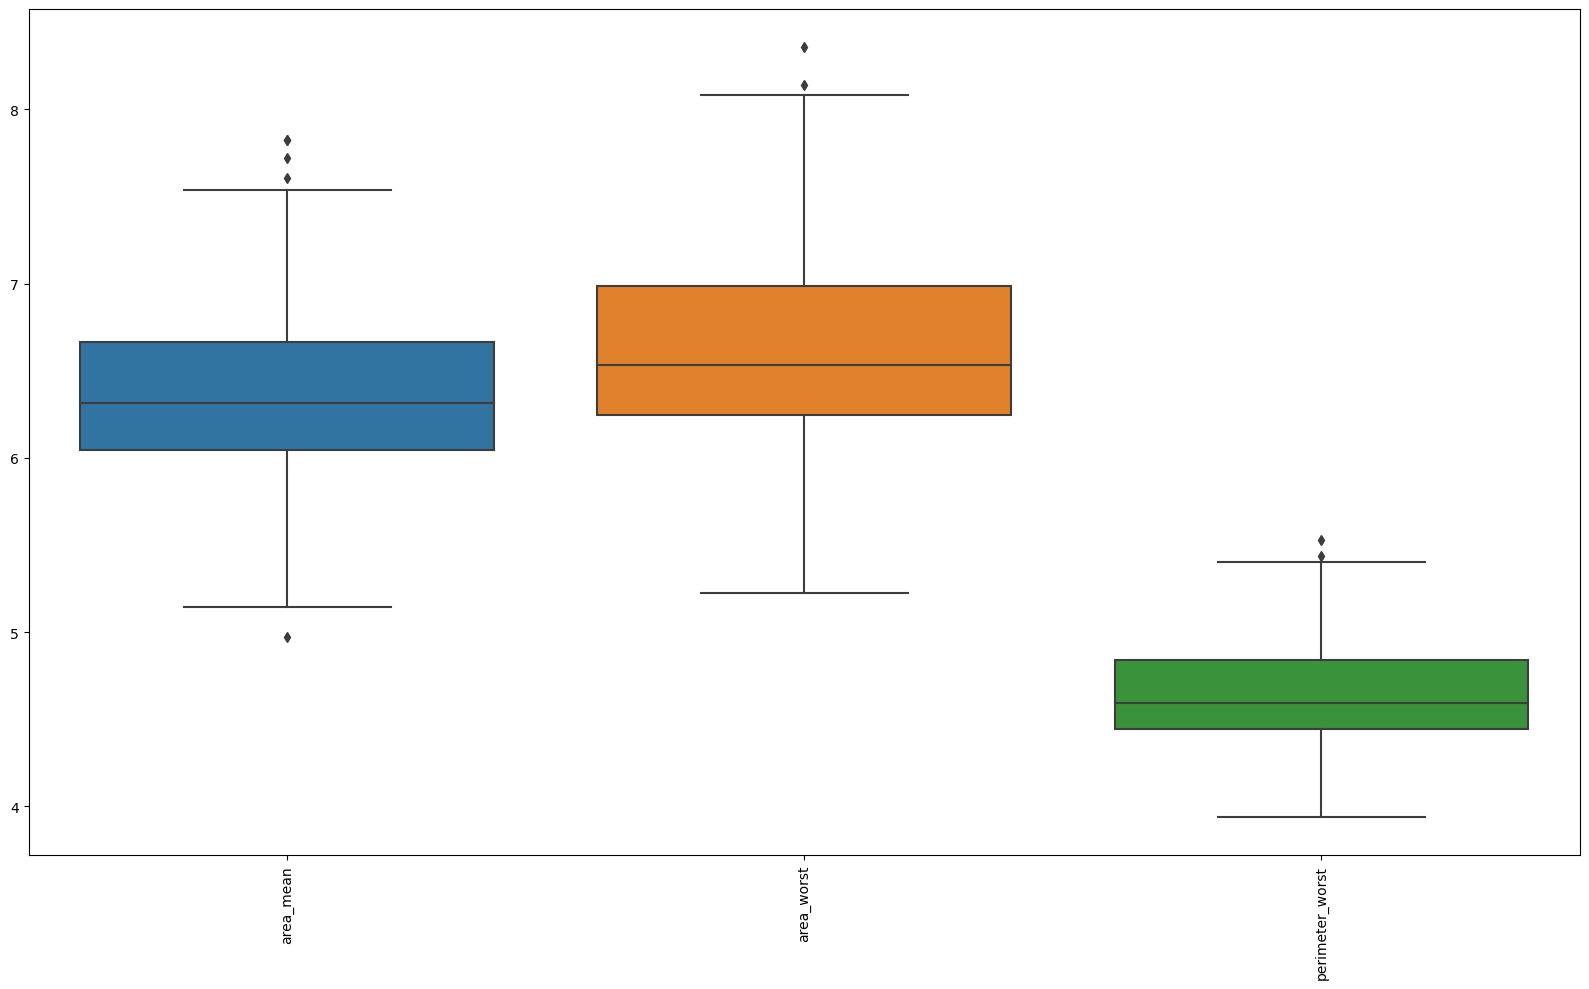

In [82]:
# Check data distribution in the dataset using box plot after handling outliers.
# Comparing the 2 box plots we can see that the dataset is more normally distributed and its variance is more stabilized.
columns_to_plot = ["area_mean", "area_worst", "perimeter_worst"]

plt.figure(figsize=(16, 10))
sns.boxplot(data=dataset_new[columns_to_plot])
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

In [83]:
# Check the decriptive statsitics after handling outliers.
# We can clearly see a difference in the statistics of the numerical columns after handling outliers. 
print(dataset_new.describe(include="all"))

       diagnosis  radius_mean  texture_mean  perimeter_mean   area_mean  \
count        569   569.000000    569.000000      569.000000  569.000000   
unique         2          NaN           NaN             NaN         NaN   
top            B          NaN           NaN             NaN         NaN   
freq         357          NaN           NaN             NaN         NaN   
mean         NaN     2.691235      2.988199        4.500683    6.365109   
std          NaN     0.222226      0.209417        0.248328    0.482274   
min          NaN     2.077064      2.371178        3.801985    4.973280   
25%          NaN     2.541602      2.843164        4.332968    6.043345   
50%          NaN     2.665143      2.987700        4.468663    6.313729   
75%          NaN     2.820188      3.126761        4.654912    6.664026   
max          NaN     3.371082      3.695855        5.244389    7.824846   

        smoothness_mean  compactness_mean  concavity_mean  \
count        569.000000        569.000

## Task 2: Feature Engineering.

In [84]:
# Feature Engineering (Encoding categorical data):
# Rationale: Encode/Convert the categorical variable "diagnosis" into the numerical 
# variables 0 and 1 representing "Benign" and "Malignant". 

def diagnosis_value(diagnosis): 
    if diagnosis == "M": 
        return 1
    else: 
        return 0
  
dataset_new["diagnosis"] = dataset_new["diagnosis"].apply(diagnosis_value) 
print (dataset_new.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1     2.943913      2.431857        4.818667   6.909753   
1          1     3.071303      2.932260        4.897093   7.190676   
2          1     3.029650      3.102342        4.875197   7.093405   
3          1     2.519308      3.062456        4.364117   5.958683   
4          1     3.058237      2.730464        4.913390   7.168580   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0         0.111899          0.244983        0.262441             0.137237   
1         0.081340          0.075701        0.083330             0.067818   
2         0.104000          0.148334        0.180153             0.120357   
3         0.133219          0.249902        0.216240             0.100026   
4         0.095583          0.124692        0.180653             0.099212   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0       0.216642  ...      3.272606       2.9

In [85]:
# Feature Engineering (Feature scaling):
# Rationale: Scale numerical variables to ensure that all features have a similar scale or range.
# We want to scale all columns in the dataset except the "diagnosis" column.

scaler = StandardScaler()
columns_to_scale = dataset_new.columns[dataset_new.columns != "diagnosis"]
dataset_new[columns_to_scale] = scaler.fit_transform(dataset_new[columns_to_scale])


In [86]:
dataset_new

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.138030,-2.658957,1.281628,1.130319,1.563449,3.150675,2.567947,2.487638,2.190236,...,1.764045,-1.510820,2.022158,1.794344,1.305475,2.479386,2.003224,2.207318,2.682614,1.939736
1,1,1.711783,-0.267352,1.597721,1.713327,-0.827189,-0.481575,0.011104,0.571874,0.012967,...,1.706795,-0.270246,1.502321,1.737118,-0.368341,-0.411700,-0.077623,1.095013,-0.228740,0.292501
2,1,1.524183,0.545532,1.509470,1.511457,0.945465,1.076890,1.393265,2.021815,0.948160,...,1.490832,0.090437,1.362620,1.493444,0.536578,1.146233,0.929353,1.900749,1.177854,0.211979
3,1,-0.774335,0.354902,-0.550424,-0.843470,3.231311,3.256221,1.908415,1.460738,2.808556,...,-0.179580,0.245955,-0.130272,-0.494860,3.305163,3.449402,1.907919,2.099822,5.487455,4.813255
4,1,1.652935,-1.231809,1.663405,1.667470,0.287017,0.569623,1.400416,1.438255,0.001931,...,1.326223,-1.669634,1.355825,1.346061,0.230922,-0.280508,0.700235,0.751489,-0.888983,-0.395358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,1.913894,0.784341,1.862731,1.939791,1.044107,0.247102,1.937135,2.289654,-0.304526,...,1.774231,0.230178,1.657467,1.801482,0.388351,-0.236048,0.749559,1.602662,-1.423641,-0.714380
565,1,1.618960,1.852867,1.546223,1.609098,0.109066,0.005393,0.742009,1.278103,-0.208295,...,1.509559,1.786703,1.418731,1.516532,-0.688540,-0.371558,0.326406,0.755918,-0.530685,-0.986556
566,1,0.795674,1.825009,0.779548,0.810991,-0.840893,-0.016008,0.084595,0.126038,-0.811393,...,0.695965,1.305202,0.723492,0.737220,-0.809147,0.427907,0.417919,0.443093,-1.144099,-0.315157
567,1,1.718043,2.026156,1.808820,1.615665,1.521469,3.140596,3.120394,2.605271,2.113200,...,1.816145,1.913913,2.022158,1.608024,1.425352,3.457622,2.809212,2.201892,1.912940,2.216489


## Task 3: Machine Learning Model Development.

In [87]:
# Logistic Regression:
# Select features and target variables.
x = dataset_new.drop(["diagnosis"],axis=1)
y = dataset_new[["diagnosis"]]

# Split the dataset into train set and test set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

# Create a logistic regression classifier.
clf = LogisticRegression()

# Train the Logistic Regression model on the training data.
clf.fit(x_train, y_train)

# Predict probabilities of each class for the test data.
y_pred_probs = clf.predict_proba(x_test)

# Predict class labels. 
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate and print the test accuracy score.
test_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Test Accuracy:", test_accuracy*100,"%")

Logistic Regression Test Accuracy: 98.40425531914893 %


In [88]:
# Support Vector Machine (SVM):
# Build and train the model.
SVM = SVC(kernel="linear")
SVM.fit(x_train, y_train)

# Make predictions.
predictions = SVM.predict(x_test)

# Calculate and print the test accuracy score.
predictions = SVM.predict(x_test)
print("SVM Test Accuracy:", accuracy_score(y_test, predictions)*100,"%")

SVM Test Accuracy: 97.87234042553192 %


In [89]:
# Random Forest:
# Create a Random Forest classifier.
rfc = RandomForestClassifier(random_state=42)

# Fit the model to the train set. 
rfc.fit(x_train, y_train)

# Predict the Test set results.
y_pred_rfc = rfc.predict(x_test)

# Calculate and print the test accuracy score.
print("Random Forest Test Accuracy:",(accuracy_score(y_test, y_pred_rfc))*100,"%")

Random Forest Test Accuracy: 96.27659574468085 %


In [90]:
# Visualize feature scores.
#Featutre importance. 
feature_scores = pd.Series(rfc.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores


concave_points_worst       0.140608
concave_points_mean        0.132638
area_worst                 0.125211
concavity_mean             0.088845
perimeter_worst            0.083761
radius_worst               0.047649
radius_mean                0.046295
perimeter_mean             0.044979
area_se                    0.039836
area_mean                  0.039784
concavity_worst            0.031618
compactness_worst          0.019798
radius_se                  0.019573
texture_worst              0.015630
symmetry_worst             0.014870
texture_mean               0.012876
compactness_mean           0.012574
perimeter_se               0.011933
smoothness_worst           0.010355
smoothness_se              0.009875
concavity_se               0.008994
fractal_dimension_mean     0.006518
fractal_dimension_se       0.005896
compactness_se             0.005428
symmetry_se                0.005102
concave_points_se          0.004888
smoothness_mean            0.004612
fractal_dimension_worst    0

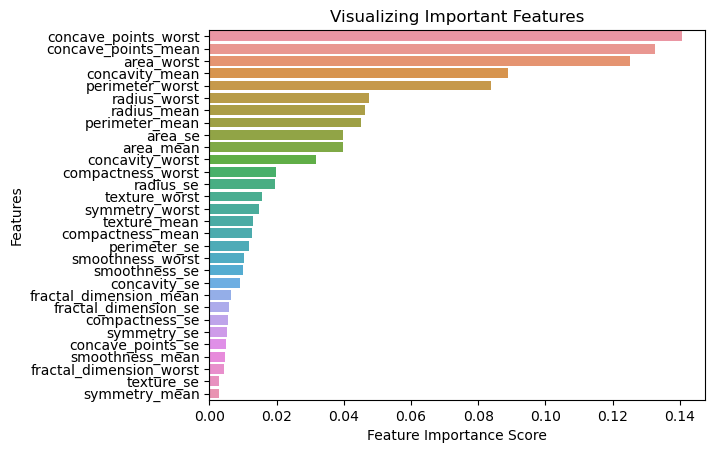

In [91]:
# Create a bar plot.
sns.barplot(x=feature_scores, y=feature_scores.index)

# Lable the graph.
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.show()

In [92]:
# Random forest classifier on selected features.
# Feature selection did not increase the model's accuracy but in fact decreased it. 
# Select features and target variables.
x1 = dataset_new.drop(["diagnosis", "compactness_worst", "radius_se", "texture_worst", "symmetry_worst"
                      , "texture_mean", "compactness_mean", "perimeter_se", "smoothness_worst", "smoothness_se"
                      , "concavity_se", "fractal_dimension_mean", "fractal_dimension_se", "compactness_se"
                      , "symmetry_se", "concave_points_se", "smoothness_mean", "fractal_dimension_worst"
                      , "texture_se", "symmetry_mean"],axis=1)
y1 = dataset_new[["diagnosis"]]

# Split the dataset into train set and test set.
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.33, random_state = 42)

# Create a Random Forest classifier.
rfc1 = RandomForestClassifier(random_state=42)

# Fit the model to the train set. 
rfc1.fit(x1_train, y1_train)

# Predict the Test set results.
y_pred_rfc1 = rfc1.predict(x1_test)

# Calculate and print the test accuracy score.
print("Random Forest Test Accuracy:",(accuracy_score(y1_test, y_pred_rfc1))*100,"%")

Random Forest Test Accuracy: 95.2127659574468 %


## Task 4: Model Evaluation and Fine-tuning. 

In [93]:
"""The best performing matrix among logistic regression, SVM, and Random forest is 
   Logistic regression since it had the highest accuracy score of 98.4%."""

# Assess the model performance. 
# Print the classification report for logistic regression classifier.
print(classification_report(y_test, y_pred))

# Create a confusion matrix fro the logistic regression classifier 
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix before hypertuning:\n\n', cm)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       121
           1       0.97      0.99      0.98        67

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188

Confusion matrix before hypertuning:

 [[119   2]
 [  1  66]]


In [96]:
# Perform model hypertuning.
# Create an instance of logistic regression classifier.
logreg = LogisticRegression()

# Define a dictionary of hyperparameters to tune.
"""-The "penalty" parameter represents the type of regularization penalty applied to the model eg. L1,L2 regularization.
   -The "C" parameter, is a regularization parameter that controls the strength of regularization.
    A smaller "C" value is indicates stronger regularization and less model complexity.
   -The "max_iter" parameter represent the number of iterations the algorithm is allowed until convergence."""
    
param_grid = {
    "penalty": ["l1", "l2"],  
    "C": np.logspace(-1, 1, 5),
    "max_iter": [100, 500]
}

# Create GridSearchCV (cross validation) object.
grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x_train, y_train)

# Print the best estimator.
print("Best performing estimator: ", grid_search.best_params_)

# Predict class labels for the test data.
y_pred=grid_search.predict(x_test)

# Calculate and print the test accuracy score.
test_accuracy_HT = accuracy_score(y_test, y_pred)
print("Logistic Regression Test Accuracy After Hypertuning:", test_accuracy_HT * 100, "%")


Best performing estimator:  {'C': 0.31622776601683794, 'max_iter': 100, 'penalty': 'l2'}
Logistic Regression Test Accuracy After Hypertuning: 98.93617021276596 %


In [95]:
# Assess the model performance once more after Hypertuning. 
# Print the classification report for logistic regression classifier.
print(classification_report(y_test, y_pred))

# Create a confusion matrix fro the logistic regression classifier 
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix after hypertuning:\n\n', cm)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       121
           1       0.99      0.99      0.99        67

    accuracy                           0.99       188
   macro avg       0.99      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188

Confusion matrix after hypertuning:

 [[120   1]
 [  1  66]]


## Task 5: Model Deployment.

In [32]:
# The rest of the code will be shared in another .py file. 
import pickle
filename = "Breast_cancer_1.sav"
pickle.dump(clf, open(filename, "wb"))

## Refrences:

https://stackoverflow.com/questions/64556501/plot-only-some-columns-with-seaborn-pairplot

https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

https://www.geeksforgeeks.org/ml-kaggle-breast-cancer-wisconsin-diagnosis-using-knn/?ref=lbp

https://stackoverflow.com/questions/70007916/how-to-scale-all-columns-except-certain-ones-in-pandas-dataframe

https://www.kaggle.com/code/funxexcel/p2-logistic-regression-hyperparameter-tuning

https://www.kaggle.com/code/houssemayed/heart-disease-prediction-feature-engineering#Feature-engineering